# RBIG Demo

In [1]:
import sys, os
from pyprojroot import here

# spyder up to find the root
root = here(project_files=[".here"])

# append to path
sys.path.append(str(root))

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import corner

In [3]:
ntrain = 10_000
nvalid = 5_000
ntest = 10_000
nplot = 1_000_000
noise = 0.1
random_state = 123
train_data = make_moons(n_samples=ntrain, noise=noise, random_state=random_state)[0]
val_data = make_moons(n_samples=nvalid, noise=noise, random_state=random_state)[0]
test_data = make_moons(n_samples=ntest, noise=noise, random_state=random_state*10)[0]
plot_data = make_moons(n_samples=nplot, noise=noise, random_state=random_state*10)[0]

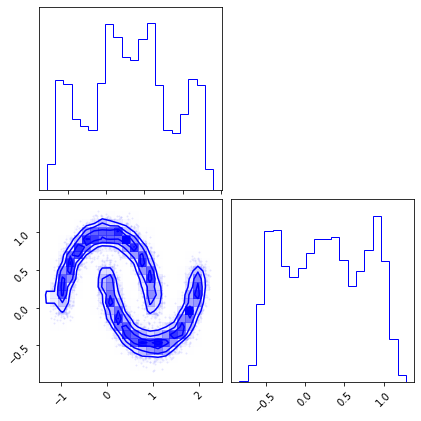

In [4]:
fig = plt.figure(figsize=(7, 7))

corner.corner(train_data, color="blue", fig=fig)

plt.show()

In [5]:
from rbig._src.uniform import MarginalHistogramUniformization
from rbig._src.invcdf import InverseGaussCDF
from rbig._src.rotation import PCARotation
from rbig._src.losses import negative_log_likelihood
from rbig._src.total_corr import information_reduction
from rbig._src.training import train_rbig_info_loss
from tqdm.notebook import trange
import numpy as np

2021-10-16 23:46:31,246: INFO: Note: NumExpr detected 28 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-10-16 23:46:31,247: INFO: NumExpr defaulting to 8 threads.


In [6]:
gf_model = train_rbig_info_loss(train_data, max_layers=1_000, zero_tolerance=30)


Completed! (Total Info Red: 1.2090):   6%|▌         | 56/1000 [00:01<00:25, 37.30it/s]


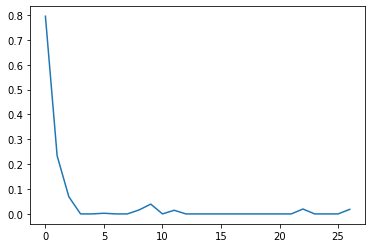

In [7]:
plt.plot(gf_model.info_loss)

## Latent Space

In [8]:
Xg = gf_model.forward(train_data)

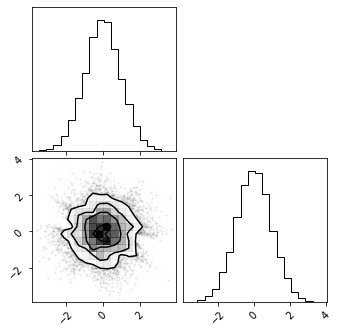

In [9]:
fig = corner.corner(Xg)


## Samples


In [10]:
X_samples = gf_model.sample(10_000)

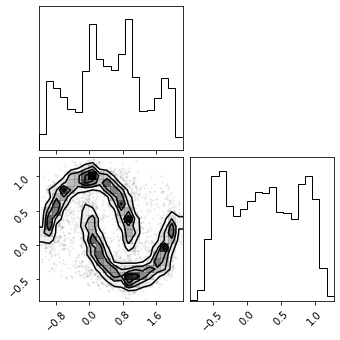

In [11]:
fig = corner.corner(X_samples)

In [12]:
gf_model.info_loss.sum()


1.2089885633261277